In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
# from skimage.draw import circle
from numpy.fft import fft2,ifft2,fftshift,ifftshift
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [3]:
from skimage.draw import disk
def Circ(r, L): #circle
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    x, y = disk(center, r)
    aperture[x, y] = 1
    return aperture

In [4]:
def Rec(w,h, L): #rectangle
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    for i in np.arange(center[0]-w//2,center[0]+w//2): #width
        for j in np.arange(center[1]-h//2,center[1]+h//2) : #height
            aperture[int(i)][int(j)] = 1
    return aperture

In [5]:
def Slit(d,h,w, L): #doubleslit
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    x = (center[0]-d/2,center[0]+d/2)
    for i1 in np.arange(x[0]-w,x[0]):
        for i2 in np.arange(x[1], x[1]+w):
            for j in np.arange(center[1]-h//2,center[1]+h//2):
                aperture[int(j)][int(i1)] = 1
                aperture[int(j)][int(i2)] = 1
    return aperture

def triangle(height, L):
    aperture = np.zeros(shape = (L,L), dtype = float)
    tip = (int(L/3),int(L/2))
#     height = 20
    for i in np.arange(0, height):
        aperture[tip[0], tip[1]] = 1
        aperture[tip[0]+i, tip[1]-i:tip[1]+i] = 1
    return aperture

def Rand_Circs(r, num_circles, L):
    aperture = np.zeros(shape = (L,L), dtype = float)
    i = 0
    while i<num_circles:
        center = random.randint(10,L), random.randint(10,L)
        x, y = disk(center, r)
        aperture[x, y] = 1
        i += 1
    return aperture

In [6]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

In [7]:
image = Circ(50, 128)

In [8]:
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]

cmap = 'magma'

In [9]:
from skimage.transform import iradon

reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')
error = reconstruction_fbp - image

Text(0.5, 1.0, 'Error')

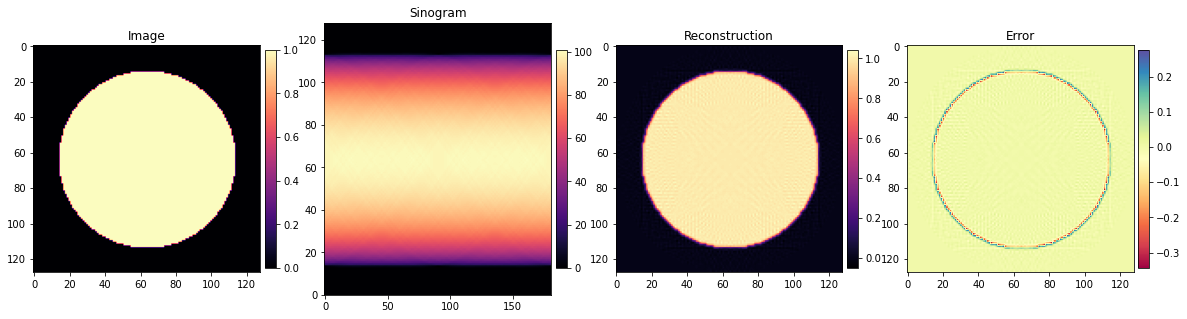

In [10]:
fig = plt.figure(figsize=(20,5))   
plt.subplot(141)
im = plt.imshow(image, cmap)
cbar = plt.colorbar(im, fraction=0.045, pad=0.02)
plt.title('Image')

plt.subplot(142)
im2 = plt.imshow(sinogram, cmap=cmap,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')
cbar2 = plt.colorbar(im2, fraction=0.045, pad=0.02)
plt.title('Sinogram')

plt.subplot(143)
im3 = plt.imshow(reconstruction_fbp, cmap=cmap)#,
cbar3 = plt.colorbar(im3, fraction=0.045, pad=0.02)
plt.title('Reconstruction')


plt.subplot(144)
im4 = plt.imshow(error, cmap='Spectral')#,
cbar4 = plt.colorbar(im4, fraction=0.045, pad=0.02)
plt.title('Error')


In [11]:
def Radon(image):

    theta = np.linspace(0., 180., max(image.shape), endpoint=False)
    sinogram = radon(image, theta=theta)
    dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]

    reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')
    error = reconstruction_fbp - image

    fig = plt.figure(figsize=(20,5))   
    plt.subplot(141)
    im = plt.imshow(image, cmap)
    cbar = plt.colorbar(im, fraction=0.045, pad=0.02)
    plt.title('Image')

    plt.subplot(142)
    im2 = plt.imshow(sinogram, cmap=cmap,
               extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
               aspect='auto')
    cbar2 = plt.colorbar(im2, fraction=0.045, pad=0.02)
    plt.title('Sinogram')

    plt.subplot(143)
    im3 = plt.imshow(reconstruction_fbp, cmap=cmap)#,
    cbar3 = plt.colorbar(im3, fraction=0.045, pad=0.02)
    plt.title('Reconstruction')


    plt.subplot(144)
    im4 = plt.imshow(error, cmap='Spectral')#,
    cbar4 = plt.colorbar(im4, fraction=0.045, pad=0.02)
    plt.title('Error')


In [12]:
from skimage import color, data
from skimage.transform import rescale

img1 = color.rgb2gray(data.astronaut())

In [142]:
import skimage.io

img2 = skimage.io.imread('./Activity 5 - Fourier Ghost Imaging/VIP.png', as_gray=True)
img2 = rescale(img2, 0.5, anti_aliasing=False)

FileNotFoundError: No such file: '/Users/reneprincipe/Library/CloudStorage/GoogleDrive-rlprincipe@up.edu.ph/My Drive/MS Physics/3.2/Physics 305/Physics-305/Activity 6 - Radon Transform/Activity 5 - Fourier Ghost Imaging/VIP.png'

/opt/anaconda3/lib/python3.9/site-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


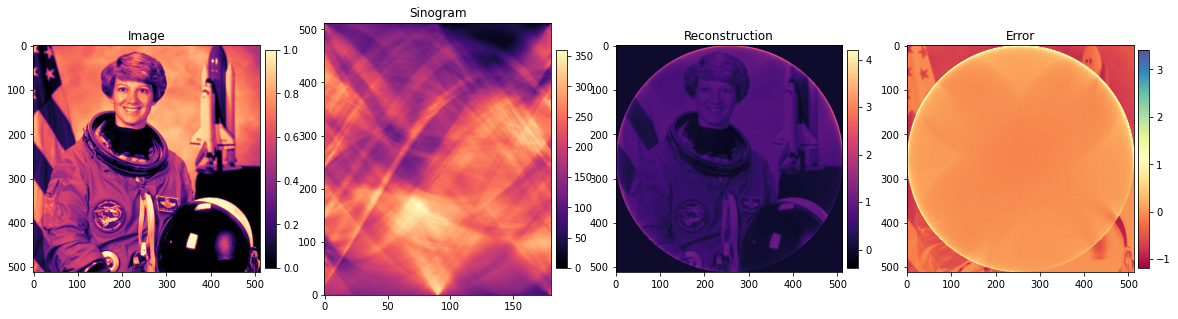

In [14]:
Radon(img1)

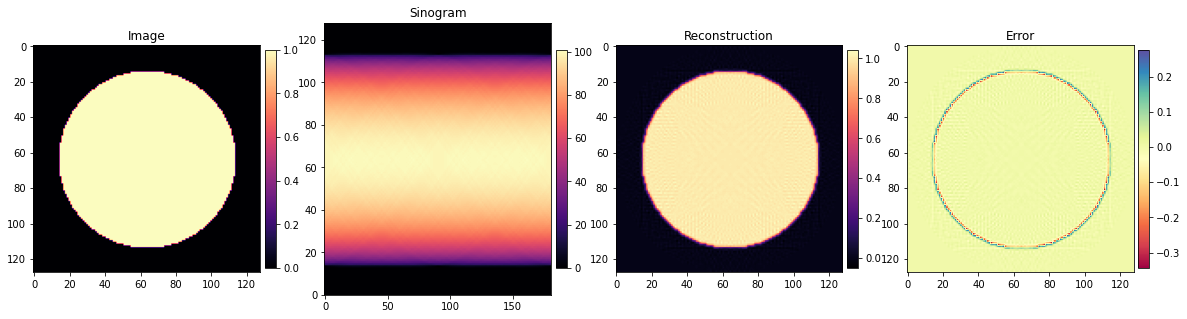

In [16]:
Radon(Circ(50, 128))

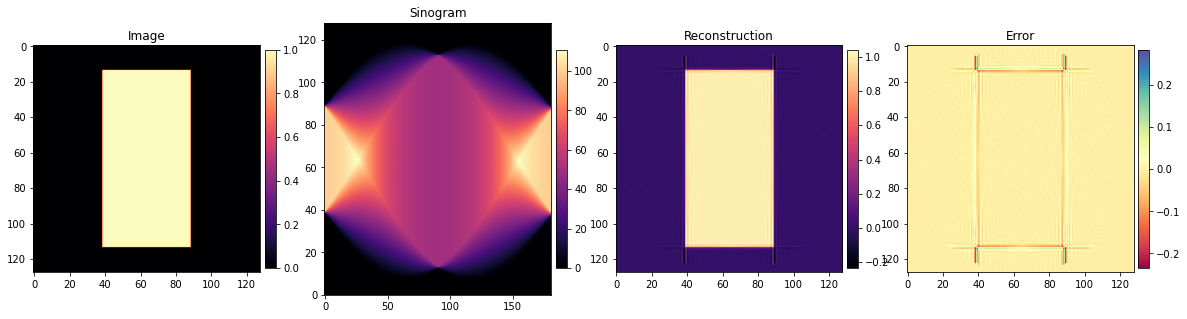

In [17]:
Radon(Rec(100,50,128))

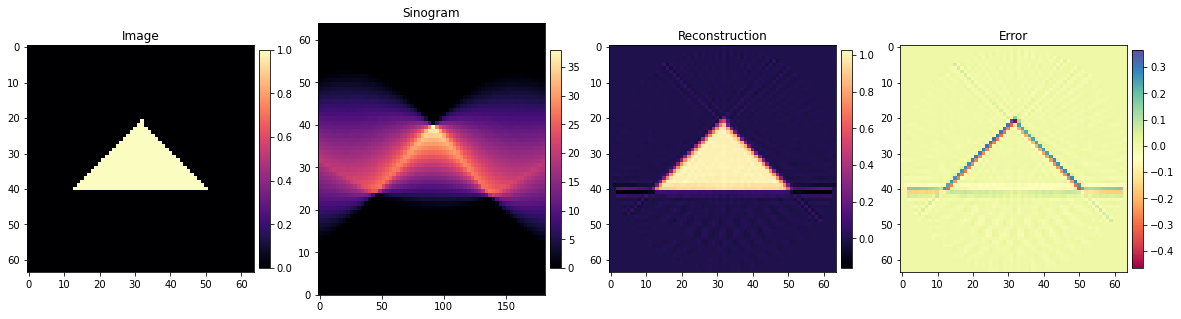

In [18]:
Radon(triangle(20, 64))

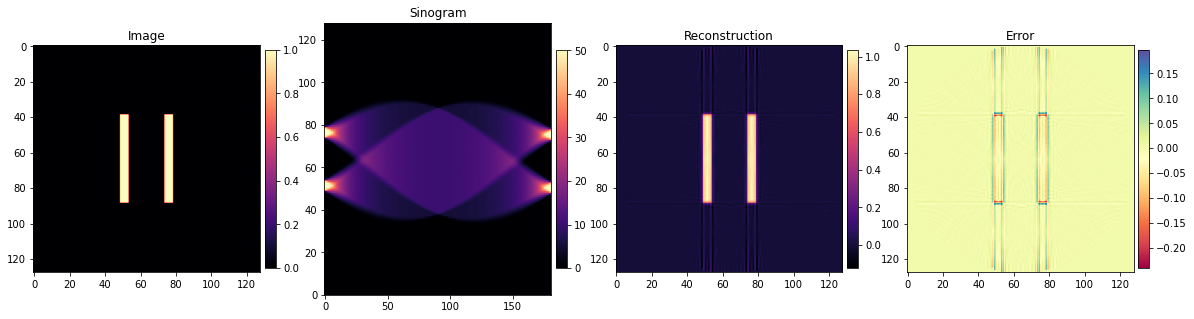

In [19]:
Radon(Slit(20,50,5,128))

In [20]:
Radon(Rand_Circs(5, 10, 128))

IndexError: index 128 is out of bounds for axis 0 with size 128

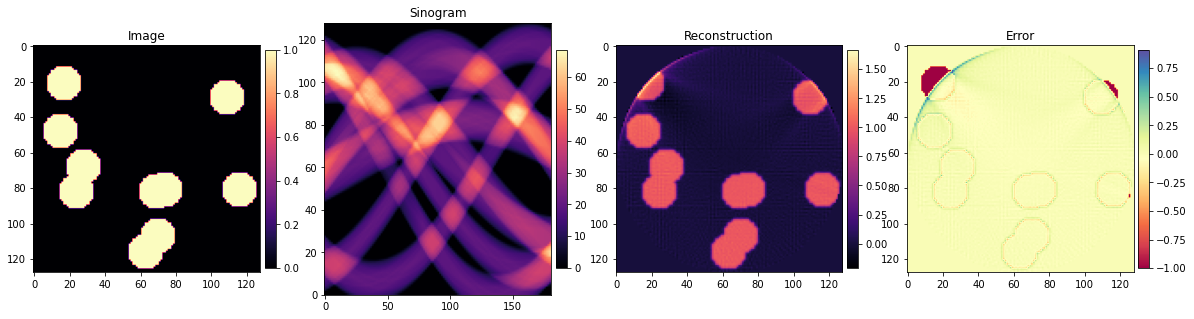

In [24]:
Radon(Rand_Circs(10, 10, 128))

In [25]:
from numpy.fft import fft2,ifft2,fftshift,ifftshift

def FFT(aperture):
    cmap = 'inferno'
    fig = plt.figure(figsize=(20,60))
    ax1 = fig.add_subplot(131)
    im1 = ax1.imshow(aperture, cmap = cmap)
    plt.title('Aperture')
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')
    
    ft_aperture = fft2(aperture)
    FT_aperture = fftshift(np.abs(ft_aperture))
    
    ax2 = fig.add_subplot(132)
    im2 = ax2.imshow(FT_aperture, cmap = cmap)

    plt.title('FFT')
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical')
    
    ax3 = fig.add_subplot(133)
    im3 = ax3.imshow(np.log(FT_aperture), cmap = cmap)
    plt.title('FFT in log scale')
    plt.axhline(np.shape(aperture)[0]//2, ls = '--', color = 'white')
    plt.axvline(np.shape(aperture)[0]//2, ls = '--', color = 'white')
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im3, cax=cax, orientation='vertical')

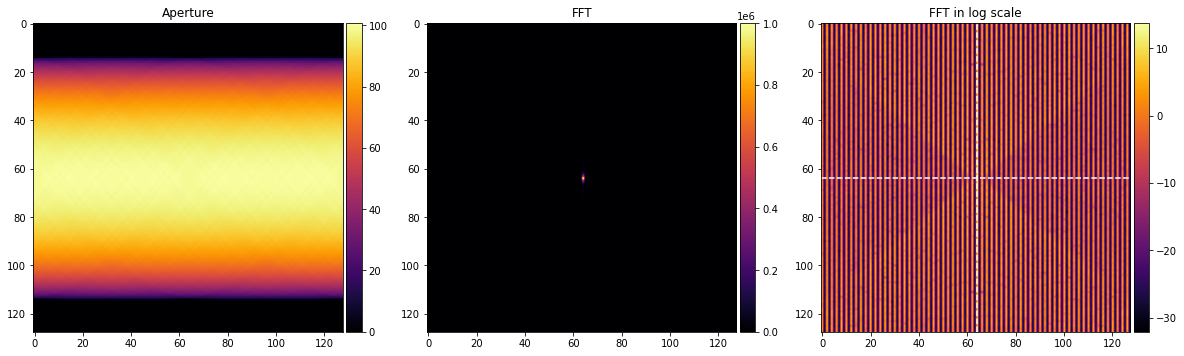

In [26]:
FFT(sinogram)

In [29]:
### Volume Visualization
from scipy.io import loadmat
from matplotlib import cm
from matplotlib import colors as mpc


D = np.random.random((200,200,20))
x = y = z = np.linspace(-1, 1, 100)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# VOLUME VISUALIZATION

## MRI Image

1. Smooth the volume data in 3D using smooth3 (D).
2. Connect data points with the same value using s= isosurface(X,Y,Z,V,isovalue).
3. Display isosurfaces using patch(s).

1. Follow the 3D visualization examples in the MATLAB link above. Show different views of the volume created.
2. OPTIONAL (Bonus) Search for freely available 3D data outside those provided by MATLAB (eg. MRI, CT Scan, etc.) and apply volume visualization.

In [70]:
mat = loadmat('mri.mat')
D = mat['D']
D = np.squeeze(D)
_map = mat['map']
image_num = 8

<IPython.core.display.Javascript object>


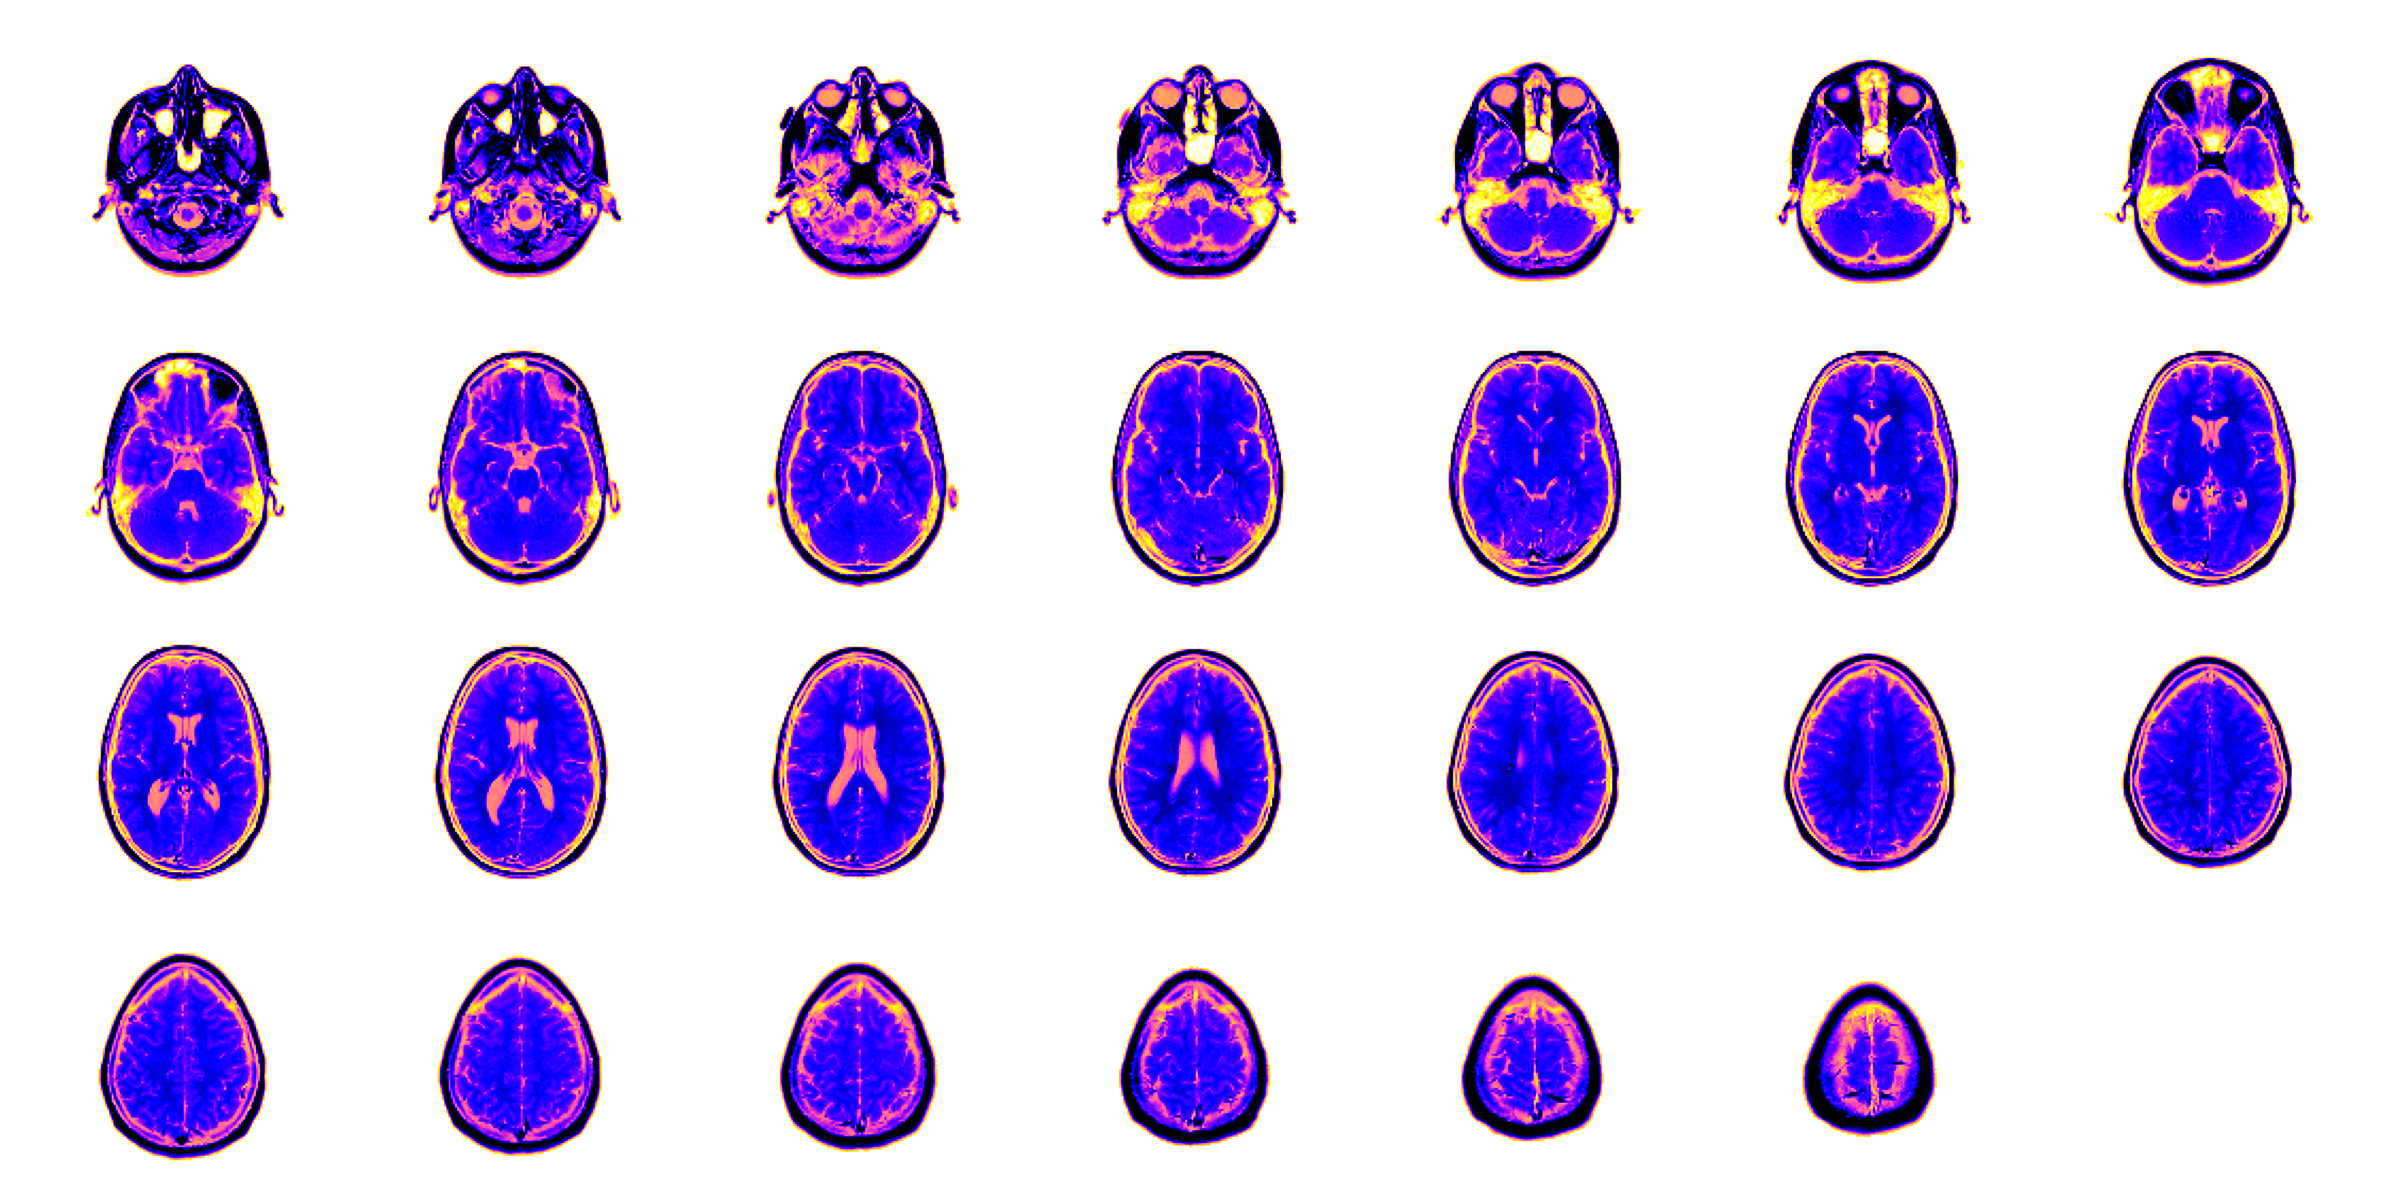

In [135]:
cmap = 'gnuplot2_r'
plt.figure(dpi = 150, figsize = (8,4))
for i in range(0, np.shape(D)[-1]):
    plt.subplot(4,7,i+1)
    plt.imshow(D[:,:,i], cmap = cmap)
    plt.axis('off')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


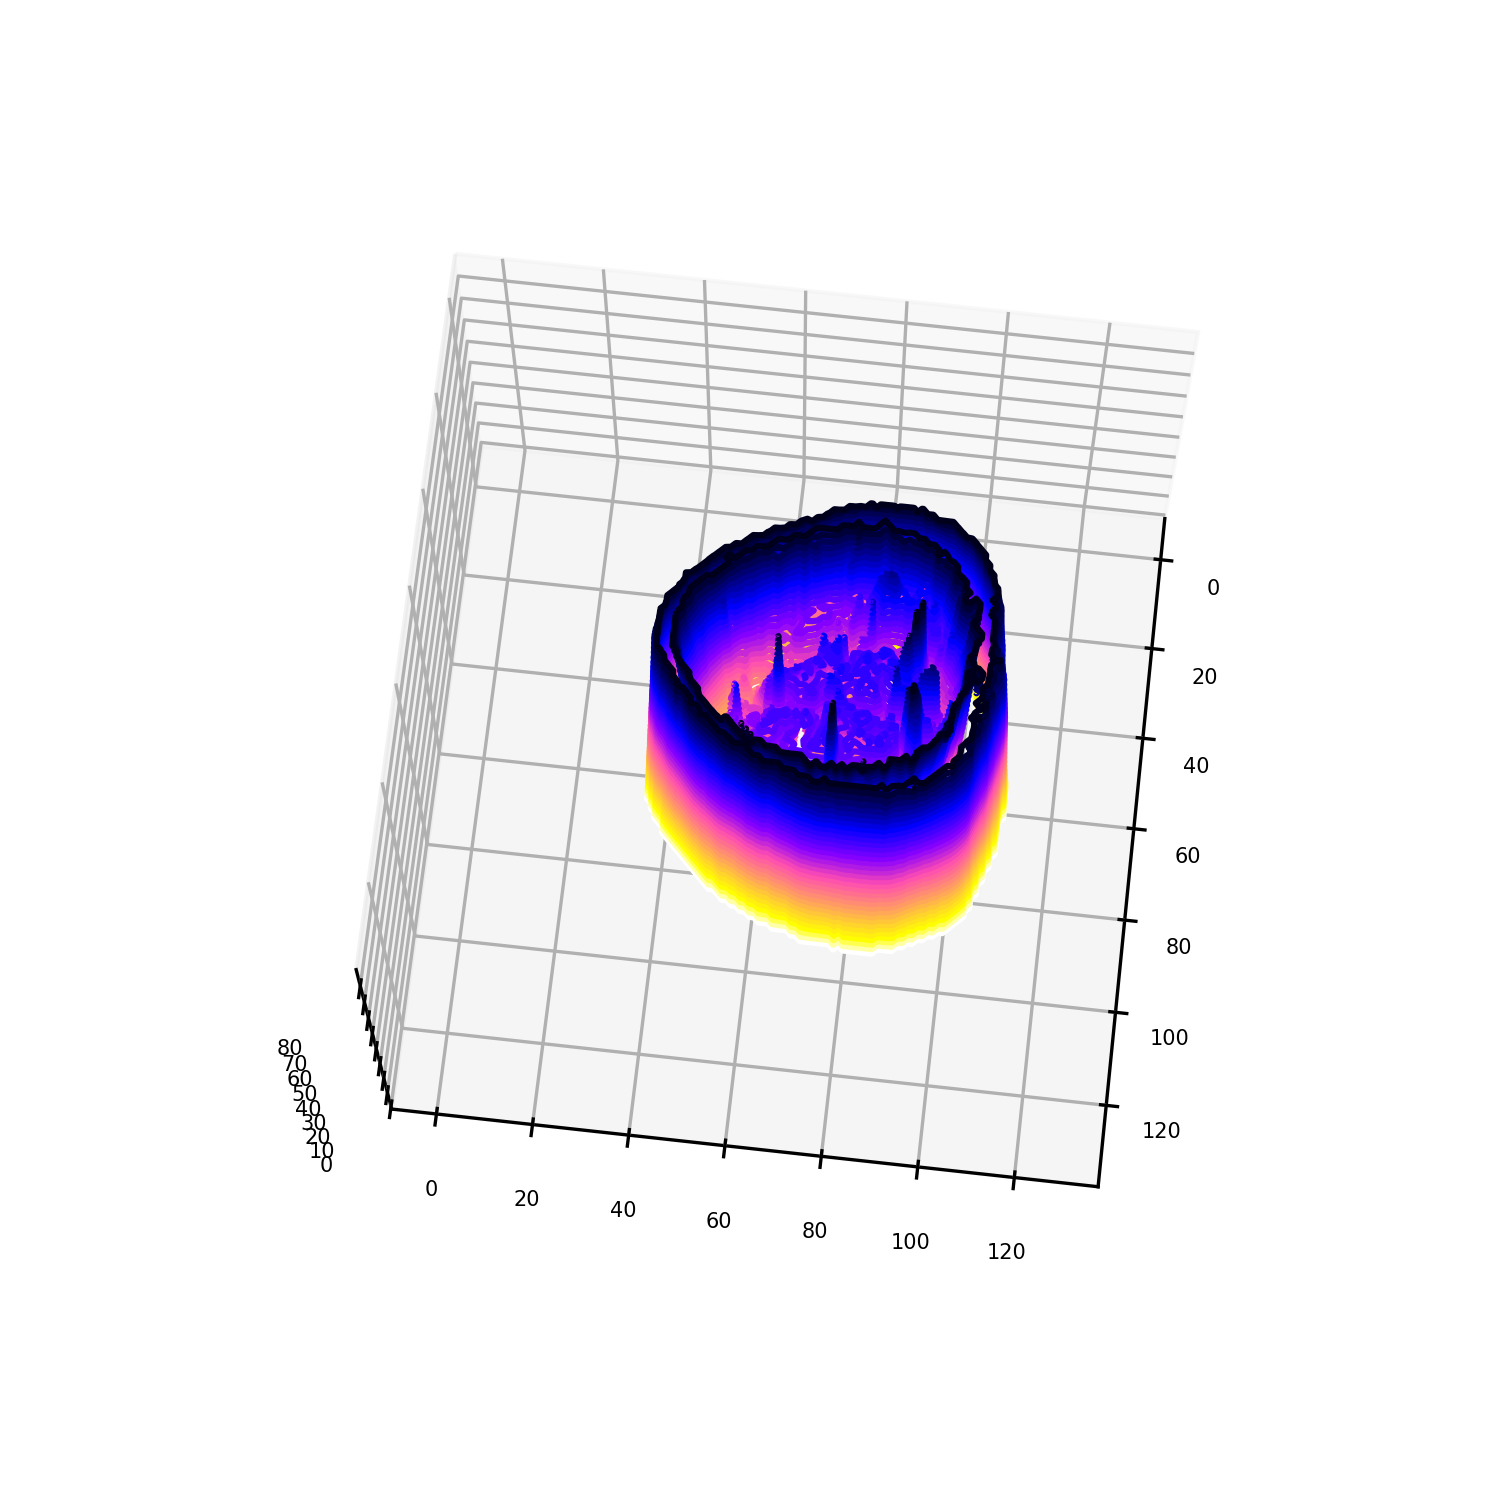

In [138]:
%matplotlib notebook
cmap = 'gnuplot2_r'
n = 3
image =  D[:,:,n]
xx = np.linspace(0,128,x)
X,Y = np.meshgrid(xx,xx)
fig = plt.figure(figsize = [5,5], dpi = 150)
plt.rcParams.update({'font.size': 5})
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, D[:,:,i], 40, cmap = cmap)

<IPython.core.display.Javascript object>


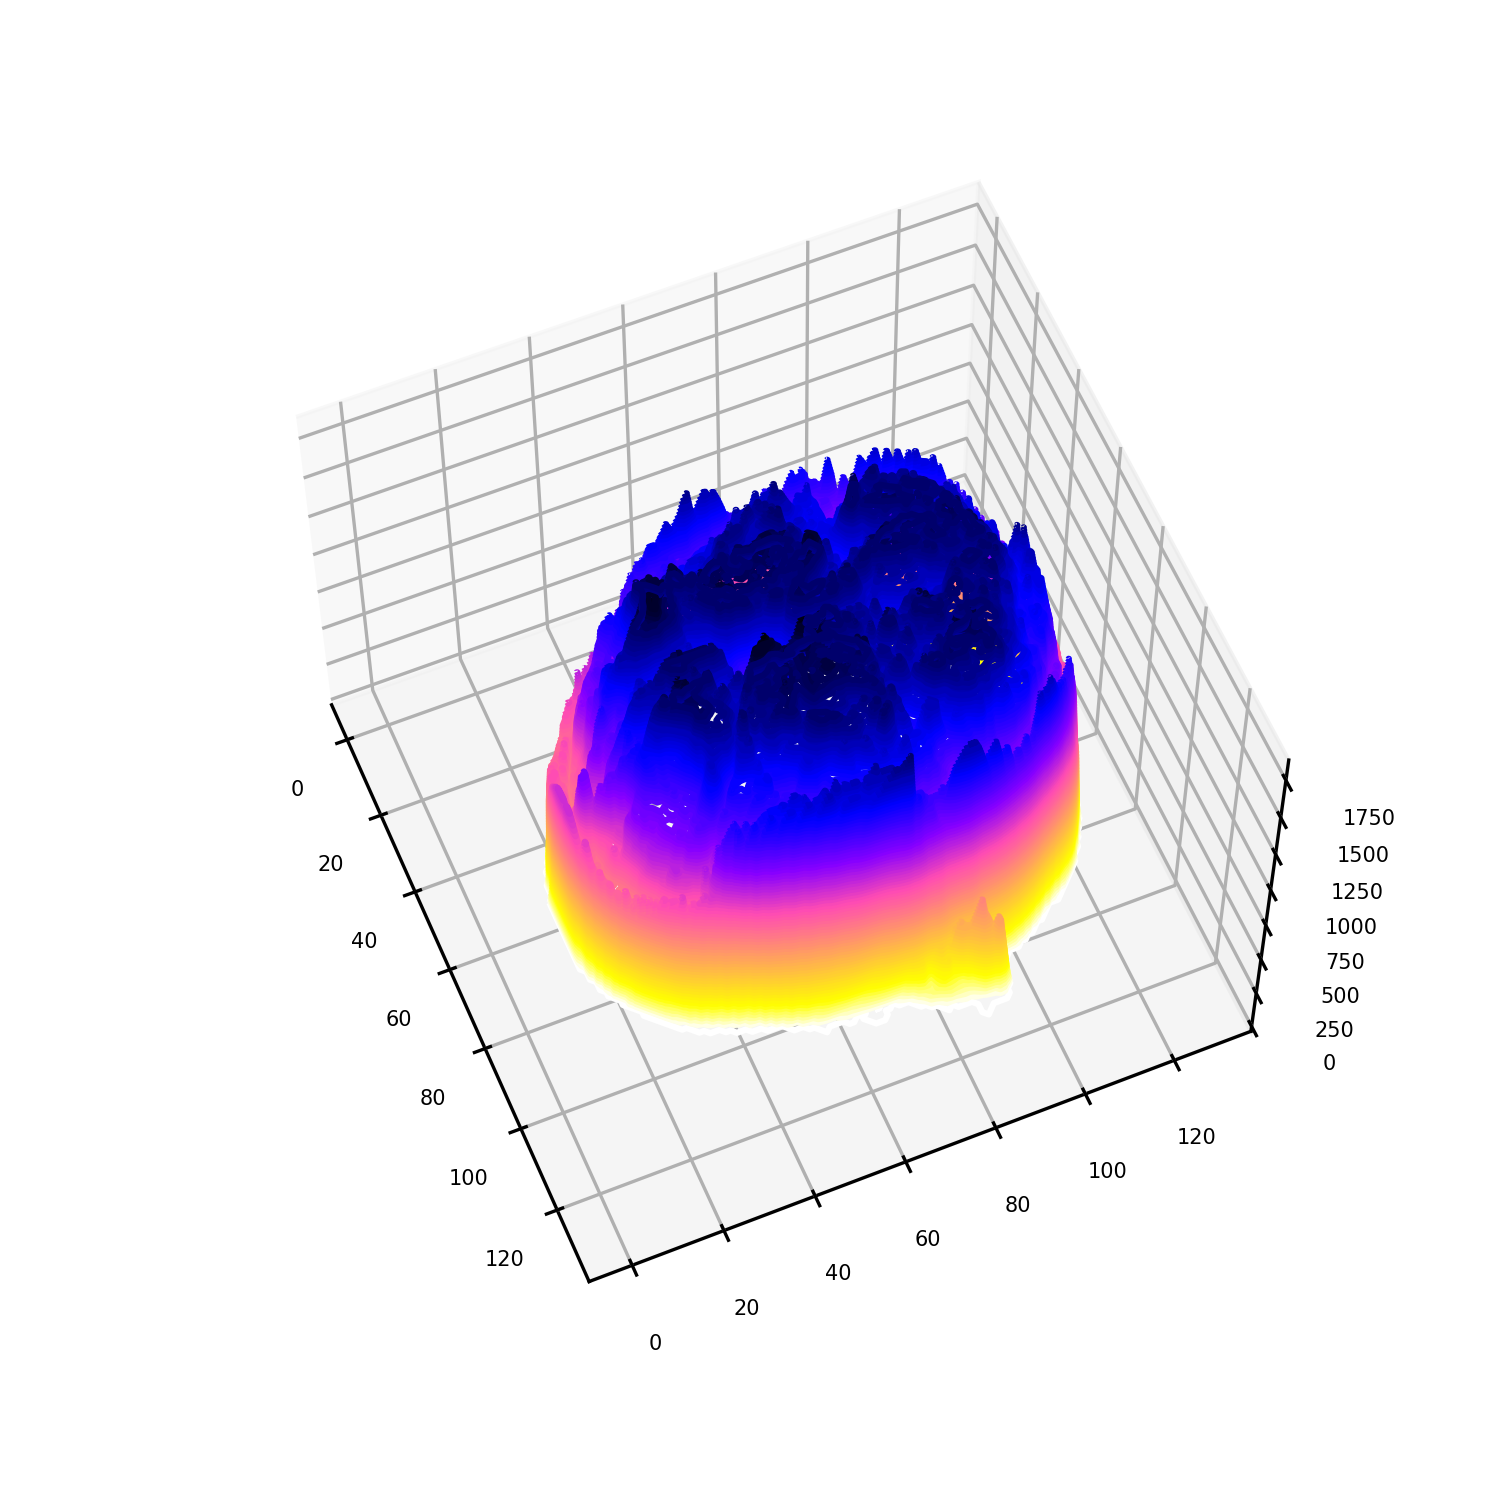

In [139]:
%matplotlib notebook

images = np.zeros(np.shape(D)[:2])
for i in range(np.shape(D)[-1]):
    image = D[:,:,i]
    images+=image
# plt.imshow(images)

fig = plt.figure(figsize = [5,5], dpi = 150)
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, images, 100, cmap = cmap)